In [1]:
from dataloaders import DataProcessor, KITTI360Dataset, DatasetLoader


In [2]:
num_buckets = 6
bucket_idx = 0
processor = DataProcessor('results.json', num_buckets=num_buckets, train_ratio=0.8)


In [3]:
train_buckets, val_buckets = processor.asc_buckets()
image_files = [d['image'] for d in train_buckets[bucket_idx]]
val_image_files = [d['image'] for d in val_buckets[bucket_idx]]
print("\n\nNumber of images: %d" % len(image_files[1]))
print("Image files: %s" % image_files[:4])

samples = image_files[:20]
val_samples = val_image_files[:10]
print("\n\nSamples: %s" % samples)
print("Validation Samples: %s" % val_samples)



Number of images: 96
Image files: ['datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0004_sync\\image_00\\data_rect\\0000009825.png', 'datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0000_sync\\image_00\\data_rect\\0000010045.png', 'datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0010_sync\\image_00\\data_rect\\0000002340.png', 'datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0006_sync\\image_00\\data_rect\\0000008030.png']


Samples: ['datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0004_sync\\image_00\\data_rect\\0000009825.png', 'datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0000_sync\\image_00\\data_rect\\0000010045.png', 'datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0010_sync\\image_00\\data_rect\\0000002340.png', 'datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0006_sync\\image_00\\data_rect\\0000008030.png', 'datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0010_sync\\image_00\\data_rect\\0000002345.png', 'datasets/data/

In [4]:
from weaklabelgenerator import labelgenerator
import network
model = 'deeplabv3plus_resnet101'
ckpt = "checkpoints/best_deeplabv3plus_resnet101_cityscapes_os16.pth"

model = network.modeling.__dict__[model](num_classes=19, output_stride=16)

# print(samples)

labelgen = labelgenerator(samples, model, ckpt, bucket_idx, val=False, order="asc")
print("\n Weak labeling for val samples now...")
labelgen = labelgenerator(val_samples, model, ckpt, bucket_idx, val=True, order="asc")

Device: cuda
Resume model from checkpoints/best_deeplabv3plus_resnet101_cityscapes_os16.pth


100%|██████████| 20/20 [00:04<00:00,  4.16it/s]


Overall average entropy for all images: 0.2492
Overall average confidence for all images: 0.9179
Saved image and label paths to outputs/weaklabels/KITTI-360/asc/bucket_0/image_label_bucket_0.json

 Weak labeling for val samples now...
Device: cuda
Resume model from checkpoints/best_deeplabv3plus_resnet101_cityscapes_os16.pth


100%|██████████| 10/10 [00:01<00:00,  8.89it/s]

Overall average entropy for all images: 0.1996
Overall average confidence for all images: 0.9344
Saved image and label paths to outputs/weaklabels/KITTI-360/asc/val_bucket_0/image_label_val_bucket_0.json


In [8]:
from weaklabelgenerator import labelgenerator
model = 'deeplabv3plus_resnet101'
ckpt = "checkpoints/best_deeplabv3plus_resnet101_cityscapes_os16.pth"

print(samples)

labelgen = labelgenerator(samples, model, ckpt, bucket_idx)

['datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0006_sync\\image_00\\data_rect\\0000008215.png', 'datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0000_sync\\image_00\\data_rect\\0000009545.png', 'datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0005_sync\\image_00\\data_rect\\0000001095.png', 'datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0000_sync\\image_00\\data_rect\\0000007830.png', 'datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0000_sync\\image_00\\data_rect\\0000004810.png', 'datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0009_sync\\image_00\\data_rect\\0000007520.png', 'datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0000_sync\\image_00\\data_rect\\0000009065.png', 'datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0004_sync\\image_00\\data_rect\\0000000325.png', 'datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0009_sync\\image_00\\data_rect\\0000003945.png', 'datasets/data/KITTI-360/data_2d_raw\\2013_05_28_drive_0004_syn

  0%|          | 0/20 [00:00<?, ?it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0006_sync\image_00\data_rect\0000008215.png


 10%|█         | 2/20 [00:00<00:04,  3.79it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0000_sync\image_00\data_rect\0000009545.png


 15%|█▌        | 3/20 [00:00<00:03,  4.36it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0005_sync\image_00\data_rect\0000001095.png


 20%|██        | 4/20 [00:00<00:03,  4.71it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0000_sync\image_00\data_rect\0000007830.png
Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0000_sync\image_00\data_rect\0000004810.png


 30%|███       | 6/20 [00:01<00:02,  4.84it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0009_sync\image_00\data_rect\0000007520.png


 35%|███▌      | 7/20 [00:01<00:02,  4.99it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0000_sync\image_00\data_rect\0000009065.png


 40%|████      | 8/20 [00:01<00:02,  5.08it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0004_sync\image_00\data_rect\0000000325.png


 45%|████▌     | 9/20 [00:01<00:02,  5.12it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0009_sync\image_00\data_rect\0000003945.png


 50%|█████     | 10/20 [00:02<00:01,  5.15it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0004_sync\image_00\data_rect\0000005550.png


 55%|█████▌    | 11/20 [00:02<00:01,  5.19it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0010_sync\image_00\data_rect\0000000805.png


 60%|██████    | 12/20 [00:02<00:01,  5.20it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0009_sync\image_00\data_rect\0000007215.png


 65%|██████▌   | 13/20 [00:02<00:01,  5.20it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0006_sync\image_00\data_rect\0000007075.png


 70%|███████   | 14/20 [00:02<00:01,  5.23it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0000_sync\image_00\data_rect\0000002030.png


 75%|███████▌  | 15/20 [00:03<00:00,  5.25it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0000_sync\image_00\data_rect\0000005130.png


 80%|████████  | 16/20 [00:03<00:00,  5.21it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0006_sync\image_00\data_rect\0000003930.png


 85%|████████▌ | 17/20 [00:03<00:00,  5.18it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0002_sync\image_00\data_rect\0000010936.png


 90%|█████████ | 18/20 [00:03<00:00,  5.13it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0002_sync\image_00\data_rect\0000010261.png


 95%|█████████▌| 19/20 [00:03<00:00,  5.16it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0000_sync\image_00\data_rect\0000005685.png


100%|██████████| 20/20 [00:04<00:00,  5.16it/s]

Processing image: datasets/data/KITTI-360/data_2d_raw\2013_05_28_drive_0002_sync\image_00\data_rect\0000014326.png


100%|██████████| 20/20 [00:04<00:00,  4.96it/s]

Overall average entropy for all images: 0.1661
Overall average confidence for all images: 0.9439
Saved image and label paths to output/weaklabels/KITTI-360/bucket_2/image_label_bucket_2.json


In [8]:
val_buckets_0  = [d['image'] for d in val_buckets[0]]
print(val_buckets_0[:5][0])

dataset/KITTI-360/data_2d_raw\2013_05_28_drive_0009_sync\image_00\data_rect\0000004985.png


In [4]:
train_buckets, val_buckets = processor.desc_buckets()
image_files = [d['image'] for d in train_buckets[bucket_idx]]
print("\n\nNumber of images: %d" % len(image_files))
print("Image files: %s" % image_files[:5])



Number of images: 2040
Image files: ['dataset/KITTI-360/data_2d_raw\\2013_05_28_drive_0002_sync\\image_00\\data_rect\\0000006081.png', 'dataset/KITTI-360/data_2d_raw\\2013_05_28_drive_0009_sync\\image_00\\data_rect\\0000013585.png', 'dataset/KITTI-360/data_2d_raw\\2013_05_28_drive_0002_sync\\image_00\\data_rect\\0000011311.png', 'dataset/KITTI-360/data_2d_raw\\2013_05_28_drive_0002_sync\\image_00\\data_rect\\0000005291.png', 'dataset/KITTI-360/data_2d_raw\\2013_05_28_drive_0004_sync\\image_00\\data_rect\\0000011230.png']


In [5]:
train_buckets, val_buckets = processor.random_buckets()
image_files = [d['image'] for d in train_buckets[bucket_idx]]
print("\n\nNumber of images: %d" % len(image_files))
print("Image files: %s" % image_files[:5])



Number of images: 2040
Image files: ['dataset/KITTI-360/data_2d_raw\\2013_05_28_drive_0002_sync\\image_00\\data_rect\\0000011546.png', 'dataset/KITTI-360/data_2d_raw\\2013_05_28_drive_0004_sync\\image_00\\data_rect\\0000004025.png', 'dataset/KITTI-360/data_2d_raw\\2013_05_28_drive_0004_sync\\image_00\\data_rect\\0000011305.png', 'dataset/KITTI-360/data_2d_raw\\2013_05_28_drive_0000_sync\\image_00\\data_rect\\0000008765.png', 'dataset/KITTI-360/data_2d_raw\\2013_05_28_drive_0002_sync\\image_00\\data_rect\\0000011651.png']


In [11]:
import json

# Paths to the text and JSON files
text_file_path = "datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_val_frames.txt"
json_file_path = 'results_v1.json'
prefix_to_remove = 'datasets/data/KITTI-360/'

# Read the text file and store the image paths in a set for fast lookup
with open(text_file_path, 'r') as file:
    text_lines = file.readlines()
    text_image_paths = set()
    for line in text_lines:
        parts = line.strip().split()
        if parts:
            text_image_paths.add(parts[0])

print("Number of image paths in the text file: %d" % len(text_image_paths))
print("Image paths: %s" % list(text_image_paths)[:5])

# Read the JSON file
with open(json_file_path, 'r') as file:
    json_data = json.load(file)

# Update the JSON data
for item in json_data:
    image_path = item.get("image", "").replace(prefix_to_remove, "")
    # print(image_path)
    if image_path in text_image_paths:
        print("Found image path in text file: %s" % image_path)
        item["val_set"] = True
    else:
        item["val_set"] = False

# Write the updated JSON data back to the file
with open(json_file_path, 'w') as file:
    json.dump(json_data, file, indent=4)

print("JSON file updated successfully.")


Number of image paths in the text file: 12276
Image paths: ['data_2d_raw/2013_05_28_drive_0005_sync/image_00/data_rect/0000005630.png', 'data_2d_raw/2013_05_28_drive_0005_sync/image_00/data_rect/0000006166.png', 'data_2d_raw/2013_05_28_drive_0006_sync/image_00/data_rect/0000000166.png', 'data_2d_raw/2013_05_28_drive_0000_sync/image_00/data_rect/0000001203.png', 'data_2d_raw/2013_05_28_drive_0005_sync/image_00/data_rect/0000006039.png']
Found image path in text file: data_2d_raw/2013_05_28_drive_0010_sync/image_00/data_rect/0000002660.png
Found image path in text file: data_2d_raw/2013_05_28_drive_0010_sync/image_00/data_rect/0000002650.png
Found image path in text file: data_2d_raw/2013_05_28_drive_0010_sync/image_00/data_rect/0000002655.png
Found image path in text file: data_2d_raw/2013_05_28_drive_0010_sync/image_00/data_rect/0000002615.png
Found image path in text file: data_2d_raw/2013_05_28_drive_0006_sync/image_00/data_rect/0000009500.png
Found image path in text file: data_2d_r

In [15]:
import json

# Paths to the text and JSON files
text_file_path = "datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_val_frames.txt"
json_file_path = 'results_v1.json'
prefix_to_remove = 'datasets/data/KITTI-360/'
image_to_ground_truth = {}
# Read the text file and store the image paths in a set for fast lookup
with open(text_file_path, 'r') as file:
    for line in file:
        raw_image, semantic_image = line.strip().split()
        image_to_ground_truth[raw_image] = semantic_image

# Read the JSON file
with open(json_file_path, 'r') as file:
    json_data = json.load(file)

# Update the JSON data
for item in json_data:
    image_path = item.get("image", "").replace(prefix_to_remove, "")
    #print(image_path)
    if image_path in image_to_ground_truth:
        item["ground_truth"] = 'datasets/data/KITTI-360/' + image_to_ground_truth[image_path]

# Step 4: Write the modified JSON data back to a file
output_json_file_path = 'kitti-360_val_set.json'

# Write the json
with open(output_json_file_path, 'w') as file:
    json.dump(json_data, file, indent=4)

print("JSON file updated successfully.")


JSON file updated successfully.


In [16]:
import json
import os

# Function to check if the file exists
def file_exists(file_path):
    return os.path.exists(file_path)

# Path to the JSON file
json_file_path = 'kitti-360_val_set.json'

# Read and parse the JSON file
with open(json_file_path, 'r') as file:
    json_data = json.load(file)

# List to store results
results = []

# Iterate through the JSON objects
for item in json_data:
    if item.get('val_set', False):
        image_path = item.get('image', '')
        ground_truth_path = item.get('ground_truth', '')
        
        image_exists = file_exists(image_path)
        ground_truth_exists = file_exists(ground_truth_path)
        
        result = {
            'image': image_path,
            'ground_truth': ground_truth_path,
            'image_exists': image_exists,
            'ground_truth_exists': ground_truth_exists
        }
        results.append(result)

# Print results
for result in results:
    print(f"Image: {result['image']}, Exists: {result['image_exists']}")
    print(f"Ground Truth: {result['ground_truth']}, Exists: {result['ground_truth_exists']}\n")

# Optionally, save the results to a new JSON file
output_json_file_path = 'kitti-360_val_set_v1.json'
with open(output_json_file_path, 'w') as file:
    json.dump(results, file, indent=4)

print('Validation complete.')


Image: datasets/data/KITTI-360/data_2d_raw/2013_05_28_drive_0010_sync/image_00/data_rect/0000002660.png, Exists: True
Ground Truth: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0010_sync/image_00/semantic/0000002660.png, Exists: True

Image: datasets/data/KITTI-360/data_2d_raw/2013_05_28_drive_0010_sync/image_00/data_rect/0000002650.png, Exists: True
Ground Truth: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0010_sync/image_00/semantic/0000002650.png, Exists: True

Image: datasets/data/KITTI-360/data_2d_raw/2013_05_28_drive_0010_sync/image_00/data_rect/0000002655.png, Exists: True
Ground Truth: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0010_sync/image_00/semantic/0000002655.png, Exists: True

Image: datasets/data/KITTI-360/data_2d_raw/2013_05_28_drive_0010_sync/image_00/data_rect/0000002615.png, Exists: True
Ground Truth: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0010_sync/image_00/semantic/0000002615

In [1]:
import json

from datasets.kitti_360 import DatasetLoader

dataset_loader = DatasetLoader()

# Path to the JSON file
json_file_path = 'kitti-360_val_set_v1.json'

# Read and parse the JSON file
with open(json_file_path, 'r') as file:
    json_data = json.load(file)

# Lists to store valid image and ground truth paths
val_image_paths = []
val_ground_truth_paths = []

# Iterate through the JSON objects
for item in json_data:
    if item.get('image_exists') and item.get('ground_truth_exists'):
        val_image_paths.append(item.get('image'))
        val_ground_truth_paths.append(item.get('ground_truth'))

# Assuming dataset_loader.get_datasets() is a function that takes two lists as arguments
val_dst = dataset_loader.get_datasets(val_image_paths, val_ground_truth_paths)

# Print or use val_dst as needed
print('Datasets loaded successfully:', val_dst)


image_paths: ['datasets/data/KITTI-360/data_2d_raw/2013_05_28_drive_0010_sync/image_00/data_rect/0000002660.png', 'datasets/data/KITTI-360/data_2d_raw/2013_05_28_drive_0010_sync/image_00/data_rect/0000002650.png']
label_paths: ['datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0010_sync/image_00/semantic/0000002660.png', 'datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0010_sync/image_00/semantic/0000002650.png']
Datasets loaded successfully: <datasets.kitti_360.KITTI360Dataset object at 0x0000020E65D43D00>


In [1]:
import os
import json

def get_file_paths(root_dir, file_extension):
    file_paths = []
    for dirpath, _, filenames in os.walk(root_dir):
        for filename in filenames:
            if filename.endswith(file_extension):
                file_paths.append(os.path.join(dirpath, filename))
    return file_paths

def create_json(image_root, label_root, json_output_path):
    image_extension = '_leftImg8bit.png'
    label_extension = '_gtFine_labelIds.png'
    
    image_paths = get_file_paths(image_root, image_extension)
    label_paths = get_file_paths(label_root, label_extension)
    
    data = []
    
    for label_path in label_paths:
        label_name = os.path.basename(label_path).replace(label_extension, '')
        matching_image_path = None
        
        for image_path in image_paths:
            if label_name in os.path.basename(image_path):
                matching_image_path = image_path
                break
        
        if matching_image_path:
            data.append({
                "image": matching_image_path,
                "ground_truth": label_path
            })
    
    with open(json_output_path, 'w') as json_file:
        json.dump(data, json_file, indent=4)

if __name__ == "__main__":
    image_root = 'datasets/data/cityscapes/leftImg8bit/val'
    label_root = 'datasets/data/cityscapes/gtFine/val'
    json_output_path = 'val_set.json'
    
    create_json(image_root, label_root, json_output_path)
    print(f"Validation set JSON file created at {json_output_path}")


Validation set JSON file created at val_set.json


In [4]:
import os
import json

def get_file_paths(root_dir, file_extension):
    file_paths = []
    for dirpath, _, filenames in os.walk(root_dir):
        for filename in filenames:
            if filename.endswith(file_extension):
                file_paths.append(os.path.join(dirpath, filename).replace("\\", "/"))
    return file_paths

def create_json(image_root, label_root, json_output_path):
    image_extension = '_leftImg8bit.png'
    label_extension = '_gtFine_labelIds.png'
    
    image_paths = get_file_paths(image_root, image_extension)
    label_paths = get_file_paths(label_root, label_extension)
    
    data = []
    
    for label_path in label_paths:
        label_name = os.path.basename(label_path).replace(label_extension, '')
        matching_image_path = None
        
        for image_path in image_paths:
            if label_name in os.path.basename(image_path):
                matching_image_path = image_path
                break
        
        if matching_image_path:
            data.append({
                "image": matching_image_path,
                "ground_truth": label_path,
                "image_exists": True,
                "ground_truth_exists": True
            })
        else:
            data.append({
                "image": None,
                "ground_truth": label_path,
                "image_exists": False,
                "ground_truth_exists": True
            })
            print(f"No matching image for label: {label_path}")
    
    with open(json_output_path, 'w') as json_file:
        json.dump(data, json_file, indent=4)

def read_json_and_print_counts(json_file_path):
    with open(json_file_path, 'r') as file:
        json_data = json.load(file)
    
    val_image_paths = []
    val_ground_truth_paths = []
    
    # Iterate through the JSON objects
    for item in json_data:
        if item['image_exists'] and item['ground_truth_exists']:
            val_image_paths.append(item['image'])
            val_ground_truth_paths.append(item['ground_truth'])
    
    print(f"Number of validation images: {len(val_image_paths)}")
    print(f"Number of validation ground truth images: {len(val_ground_truth_paths)}")

if __name__ == "__main__":
    image_root = 'datasets/data/cityscapes/leftImg8bit/val'
    label_root = 'datasets/data/cityscapes/gtFine/val'
    json_output_path = 'cityscapes_val_set.json'
    
    create_json(image_root, label_root, json_output_path)
    print(f"Validation set JSON file created at {json_output_path}")

    read_json_and_print_counts(json_output_path)


Validation set JSON file created at cityscapes_val_set.json
Number of validation images: 500
Number of validation ground truth images: 500


In [1]:
import os
import numpy as np
from PIL import Image
from concurrent.futures import ProcessPoolExecutor

def load_and_count_classes(file_path):
    try:
        mask = np.array(Image.open(file_path))
        class_count = len(np.unique(mask))
        return os.path.basename(file_path), class_count
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

def main():
    # Set the path to your KITTI-360 segmentation masks directory
    segmentation_mask_dir = "datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0000_sync/image_00/semantic/"
    
    
    # Ensure the directory exists
    if not os.path.exists(segmentation_mask_dir):
        print(f"Error: Directory {segmentation_mask_dir} does not exist.")
        return

    # Get all PNG files in the directory
    mask_files = [f for f in os.listdir(segmentation_mask_dir) if f.endswith('.png')]

    if not mask_files:
        print("No PNG files found in the specified directory.")
        return

    print(f"Found {len(mask_files)} PNG files. Processing...")

    # Process files in parallel
    with ProcessPoolExecutor() as executor:
        results = list(executor.map(load_and_count_classes, 
                                    [os.path.join(segmentation_mask_dir, f) for f in mask_files]))

    # Filter out None results (from errors) and sort by class count
    valid_results = [r for r in results if r is not None]
    sorted_images = sorted(valid_results, key=lambda x: x[1], reverse=True)

    # Select top N images with the most classes
    N = 10  # Change this to the number of images you want
    top_images = sorted_images[:N]

    print(f"\nTop {N} images with the most classes:")
    for image, class_count in top_images:
        print(f"Image: {image}, Number of classes: {class_count}")

    # Optional: Save results to a file
    with open('top_images_results.txt', 'w') as f:
        f.write(f"Top {N} images with the most classes:\n")
        for image, class_count in top_images:
            f.write(f"Image: {image}, Number of classes: {class_count}\n")

    print(f"\nResults have been saved to 'top_images_results.txt'")

if __name__ == "__main__":
    main()

Found 10238 PNG files. Processing...


BrokenProcessPool: A child process terminated abruptly, the process pool is not usable anymore

In [2]:
import os
import numpy as np
from PIL import Image
from concurrent.futures import ProcessPoolExecutor

def load_and_count_classes(file_path):
    try:
        mask = np.array(Image.open(file_path))
        class_count = len(np.unique(mask))
        return os.path.basename(file_path), class_count
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

# Set the path to your KITTI-360 segmentation masks directory
segmentation_mask_dir = "datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0000_sync/image_00/semantic/"

# Ensure the directory exists
if not os.path.exists(segmentation_mask_dir):
    print(f"Error: Directory {segmentation_mask_dir} does not exist.")
else:
    # Get all PNG files in the directory
    mask_files = [f for f in os.listdir(segmentation_mask_dir) if f.endswith('.png')]

    if not mask_files:
        print("No PNG files found in the specified directory.")
    else:
        print(f"Found {len(mask_files)} PNG files. Processing...")

        # Process files in parallel
        with ProcessPoolExecutor() as executor:
            results = list(executor.map(load_and_count_classes, 
                                        [os.path.join(segmentation_mask_dir, f) for f in mask_files]))

        # Filter out None results (from errors) and sort by class count
        valid_results = [r for r in results if r is not None]
        sorted_images = sorted(valid_results, key=lambda x: x[1], reverse=True)

        # Select top N images with the most classes
        N = 10  # Change this to the number of images you want
        top_images = sorted_images[:N]

        print(f"\nTop {N} images with the most classes:")
        for image, class_count in top_images:
            print(f"Image: {image}, Number of classes: {class_count}")

        # Optional: Save results to a file
        with open('top_images_results.txt', 'w') as f:
            f.write(f"Top {N} images with the most classes:\n")
            for image, class_count in top_images:
                f.write(f"Image: {image}, Number of classes: {class_count}\n")

        print(f"\nResults have been saved to 'top_images_results.txt'")

Found 10238 PNG files. Processing...


BrokenProcessPool: A child process terminated abruptly, the process pool is not usable anymore

In [4]:
import os
import numpy as np
from PIL import Image

def load_and_count_classes(file_path):
    try:
        mask = np.array(Image.open(file_path))
        class_count = len(np.unique(mask))
        return os.path.basename(file_path), class_count
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

# Set the path to your KITTI-360 segmentation masks directory
segmentation_mask_dir = "datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0003_sync/image_00/semantic/"

# Ensure the directory exists
if not os.path.exists(segmentation_mask_dir):
    print(f"Error: Directory {segmentation_mask_dir} does not exist.")
else:
    # Get all PNG files in the directory
    mask_files = [f for f in os.listdir(segmentation_mask_dir) if f.endswith('.png')]

    if not mask_files:
        print("No PNG files found in the specified directory.")
    else:
        print(f"Found {len(mask_files)} PNG files. Processing...")

        # Process files sequentially
        results = []
        for file in mask_files:
            file_path = os.path.join(segmentation_mask_dir, file)
            result = load_and_count_classes(file_path)
            if result:
                results.append(result)

        # Sort by class count
        sorted_images = sorted(results, key=lambda x: x[1], reverse=True)

        # Select top N images with the most classes
        N = 10  # Change this to the number of images you want
        top_images = sorted_images[:N]

        print(f"\nTop {N} images with the most classes:")
        for image, class_count in top_images:
            print(f"Image: {image}, Number of classes: {class_count}")

        # Optional: Save results to a file
        with open('top_images_results.txt', 'w') as f:
            f.write(f"Top {N} images with the most classes:\n")
            for image, class_count in top_images:
                f.write(f"Image: {image}, Number of classes: {class_count}\n")

        print(f"\nResults have been saved to 'top_images_results.txt'")

Found 988 PNG files. Processing...

Top 10 images with the most classes:
Image: 0000000199.png, Number of classes: 17
Image: 0000000186.png, Number of classes: 16
Image: 0000000194.png, Number of classes: 16
Image: 0000000198.png, Number of classes: 16
Image: 0000000202.png, Number of classes: 16
Image: 0000000206.png, Number of classes: 16
Image: 0000000214.png, Number of classes: 16
Image: 0000000796.png, Number of classes: 16
Image: 0000000016.png, Number of classes: 15
Image: 0000000181.png, Number of classes: 15

Results have been saved to 'top_images_results.txt'


In [8]:
import os
import numpy as np
from PIL import Image

def load_and_count_classes(file_path):
    try:
        mask = np.array(Image.open(file_path))
        class_count = len(np.unique(mask))
        return os.path.basename(file_path), class_count
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

def is_multiple_of_five(filename):
    # Extract the number from the filename
    number = int(filename.split('.')[0])
    return number % 5 == 0

# Set the path to your KITTI-360 segmentation masks directory
segmentation_mask_dir = "datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0003_sync/image_00/semantic/"

# Ensure the directory exists
if not os.path.exists(segmentation_mask_dir):
    print(f"Error: Directory {segmentation_mask_dir} does not exist.")
else:
    # Get all PNG files in the directory that are multiples of 5
    mask_files = [f for f in os.listdir(segmentation_mask_dir) if f.endswith('.png') and is_multiple_of_five(f)]

    if not mask_files:
        print("No suitable PNG files found in the specified directory.")
    else:
        print(f"Found {len(mask_files)} suitable PNG files. Processing...")

        # Process files sequentially
        results = []
        for file in mask_files:
            file_path = os.path.join(segmentation_mask_dir, file)
            result = load_and_count_classes(file_path)
            if result:
                results.append(result)

        # Sort by class count
        sorted_images = sorted(results, key=lambda x: x[1], reverse=True)

        # Select top N images with the most classes
        N = 197  # Change this to the number of images you want
        top_images = sorted_images[:N]

        print(f"\nTop {N} images (multiples of 5) with the most classes:")
        for image, class_count in top_images:
            print(f"Image: {image}, Number of classes: {class_count}")

        # Optional: Save results to a file
        with open('top_images_results.txt', 'w') as f:
            f.write(f"Top {N} images (multiples of 5) with the most classes:\n")
            for image, class_count in top_images:
                f.write(f"Image: {image}, Number of classes: {class_count}\n")

        print(f"\nResults have been saved to 'top_images_results.txt'")

Found 197 suitable PNG files. Processing...

Top 197 images (multiples of 5) with the most classes:
Image: 0000000185.png, Number of classes: 15
Image: 0000000190.png, Number of classes: 15
Image: 0000000195.png, Number of classes: 15
Image: 0000000200.png, Number of classes: 15
Image: 0000000210.png, Number of classes: 15
Image: 0000000645.png, Number of classes: 15
Image: 0000000685.png, Number of classes: 15
Image: 0000000700.png, Number of classes: 15
Image: 0000000730.png, Number of classes: 15
Image: 0000000010.png, Number of classes: 14
Image: 0000000015.png, Number of classes: 14
Image: 0000000205.png, Number of classes: 14
Image: 0000000215.png, Number of classes: 14
Image: 0000000220.png, Number of classes: 14
Image: 0000000225.png, Number of classes: 14
Image: 0000000230.png, Number of classes: 14
Image: 0000000310.png, Number of classes: 14
Image: 0000000640.png, Number of classes: 14
Image: 0000000670.png, Number of classes: 14
Image: 0000000675.png, Number of classes: 14


In [9]:
import os
import numpy as np
from PIL import Image

def load_and_count_classes(file_path):
    try:
        mask = np.array(Image.open(file_path))
        class_count = len(np.unique(mask))
        return file_path, class_count
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

def is_multiple_of_five(filename):
    # Extract the number from the filename
    number = int(filename.split('.')[0])
    return number % 5 == 0

# Set the base path to your KITTI-360 segmentation masks directory
base_dir = "datasets/data/KITTI-360/data_2d_semantics/train/"

# List to store all results
all_results = []

# Iterate through subdirectories
for drive in os.listdir(base_dir):
    if drive.startswith("2013_05_28_drive_") and drive.endswith("_sync"):
        semantic_dir = os.path.join(base_dir, drive, "image_00", "semantic")
        
        if os.path.exists(semantic_dir):
            print(f"Processing directory: {semantic_dir}")
            
            # Get all PNG files in the directory that are multiples of 5
            mask_files = [f for f in os.listdir(semantic_dir) if f.endswith('.png') and is_multiple_of_five(f)]

            if not mask_files:
                print("No suitable PNG files found in this directory.")
            else:
                print(f"Found {len(mask_files)} suitable PNG files. Processing...")

                # Process files sequentially
                for file in mask_files:
                    file_path = os.path.join(semantic_dir, file)
                    result = load_and_count_classes(file_path)
                    if result:
                        all_results.append(result)

# Sort all results by class count
sorted_images = sorted(all_results, key=lambda x: x[1], reverse=True)

# Select top N images with the most classes
N = 10  # Change this to the number of images you want
top_images = sorted_images[:N]

print(f"\nTop {N} images (multiples of 5) with the most classes across all directories:")
for image, class_count in top_images:
    print(f"Image: {image}, Number of classes: {class_count}")

# Optional: Save results to a file
with open('top_images_results.txt', 'w') as f:
    f.write(f"Top {N} images (multiples of 5) with the most classes across all directories:\n")
    for image, class_count in top_images:
        f.write(f"Image: {image}, Number of classes: {class_count}\n")

print(f"\nResults have been saved to 'top_images_results.txt'")

Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0000_sync\image_00\semantic
Found 2052 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0002_sync\image_00\semantic
Found 2172 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0003_sync\image_00\semantic
Found 197 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0004_sync\image_00\semantic
Found 1601 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0005_sync\image_00\semantic
Found 1213 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0006_sync\image_00\semantic
Found 1803 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI

In [10]:
import os
import numpy as np
from PIL import Image
import json

def load_and_count_classes(file_path):
    try:
        mask = np.array(Image.open(file_path))
        class_count = len(np.unique(mask))
        return file_path, class_count
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

def is_multiple_of_five(filename):
    # Extract the number from the filename
    number = int(filename.split('.')[0])
    return number % 5 == 0

# Set the base path to your KITTI-360 segmentation masks directory
base_dir = "datasets/data/KITTI-360/data_2d_semantics/train/"

# List to store all results
all_results = []

# Iterate through subdirectories
for drive in os.listdir(base_dir):
    if drive.startswith("2013_05_28_drive_") and drive.endswith("_sync"):
        semantic_dir = os.path.join(base_dir, drive, "image_00", "semantic")
        
        if os.path.exists(semantic_dir):
            print(f"Processing directory: {semantic_dir}")
            
            # Get all PNG files in the directory that are multiples of 5
            mask_files = [f for f in os.listdir(semantic_dir) if f.endswith('.png') and is_multiple_of_five(f)]

            if not mask_files:
                print("No suitable PNG files found in this directory.")
            else:
                print(f"Found {len(mask_files)} suitable PNG files. Processing...")

                # Process files sequentially
                for file in mask_files:
                    file_path = os.path.join(semantic_dir, file)
                    result = load_and_count_classes(file_path)
                    if result:
                        all_results.append(result)

# Prepare data for JSON
json_data = []
for mask_path, class_count in all_results:
    # Convert semantic path to raw data path
    raw_path = mask_path.replace("data_2d_semantics", "data_2d_raw").replace("/semantic/", "/data_rect/")
    json_data.append({
        "mask": raw_path,
        "class_count": class_count
    })

# Sort json_data by class_count in descending order
json_data.sort(key=lambda x: x['class_count'], reverse=True)

# Save all results to a JSON file
with open('all_images_class_counts.json', 'w') as f:
    json.dump(json_data, f, indent=4)

print(f"All image locations and class counts have been saved to 'all_images_class_counts.json'")

# Print top N images
N = 10  # Change this to the number of images you want to display
print(f"\nTop {N} images with the most classes:")
for item in json_data[:N]:
    print(f"Image: {item['mask']}, Number of classes: {item['class_count']}")

Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0000_sync\image_00\semantic
Found 2052 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0002_sync\image_00\semantic
Found 2172 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0003_sync\image_00\semantic
Found 197 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0004_sync\image_00\semantic
Found 1601 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0005_sync\image_00\semantic
Found 1213 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0006_sync\image_00\semantic
Found 1803 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI

In [12]:
import os
import numpy as np
from PIL import Image
import json

def load_and_count_classes(file_path):
    try:
        mask = np.array(Image.open(file_path))
        class_count = len(np.unique(mask))
        return file_path, class_count
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

def is_multiple_of_five(filename):
    # Extract the number from the filename
    number = int(filename.split('.')[0])
    return number % 5 == 0

# Set the base path to your KITTI-360 segmentation masks directory
base_dir = "datasets/data/KITTI-360/data_2d_semantics/train/"

# List to store all results
all_results = []

# Iterate through subdirectories
for drive in os.listdir(base_dir):
    if drive.startswith("2013_05_28_drive_") and drive.endswith("_sync"):
        semantic_dir = os.path.join(base_dir, drive, "image_00", "semantic")
        
        if os.path.exists(semantic_dir):
            print(f"Processing directory: {semantic_dir}")
            
            # Get all PNG files in the directory that are multiples of 5
            mask_files = [f for f in os.listdir(semantic_dir) if f.endswith('.png') and is_multiple_of_five(f)]

            if not mask_files:
                print("No suitable PNG files found in this directory.")
            else:
                print(f"Found {len(mask_files)} suitable PNG files. Processing...")

                # Process files sequentially
                for file in mask_files:
                    file_path = os.path.join(semantic_dir, file)
                    result = load_and_count_classes(file_path)
                    if result:
                        all_results.append(result)

# Prepare data for JSON
json_data = []
for mask_path, class_count in all_results:
    # Convert semantic path to raw data path
    raw_path = mask_path.replace("data_2d_semantics", "data_2d_raw").replace("semantic", "data_rect")
    # Ensure forward slashes for consistency
    raw_path = raw_path.replace("\\", "/")
    json_data.append({
        "image_path": raw_path,
        "class_count": class_count
    })

# Sort json_data by class_count in descending order
json_data.sort(key=lambda x: x['class_count'], reverse=True)

# Save all results to a JSON file
with open('all_images_class_counts.json', 'w') as f:
    json.dump(json_data, f, indent=4)

print(f"All image locations and class counts have been saved to 'all_images_class_counts.json'")

# Print top N images
N = 10  # Change this to the number of images you want to display
print(f"\nTop {N} images with the most classes:")
for item in json_data[:N]:
    print(f"Image: {item['image_path']}, Number of classes: {item['class_count']}")

Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0000_sync\image_00\semantic
Found 2052 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0002_sync\image_00\semantic
Found 2172 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0003_sync\image_00\semantic
Found 197 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0004_sync\image_00\semantic
Found 1601 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0005_sync\image_00\semantic
Found 1213 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0006_sync\image_00\semantic
Found 1803 suitable PNG files. Processing...
Processing directory: datasets/data/KITTI

KeyError: 'mask'

In [13]:
import json
from collections import defaultdict

# File path
json_file_path = 'all_images_class_counts.json'

# Read the JSON file
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Use defaultdict to group images by class count
class_count_groups = defaultdict(list)

# Group images by class count
for item in data:
    class_count = item['class_count']
    image_path = item['image_path']
    class_count_groups[class_count].append(image_path)

# Sort the class counts in descending order
sorted_class_counts = sorted(class_count_groups.keys(), reverse=True)

# Print the summary
print("Summary of images grouped by unique class counts:")
print("------------------------------------------------")
for class_count in sorted_class_counts:
    num_images = len(class_count_groups[class_count])
    print(f"Class count {class_count}: {num_images} images")

# Optional: Print total number of images
total_images = sum(len(images) for images in class_count_groups.values())
print(f"\nTotal number of images: {total_images}")

# Optional: Save the summary to a file
with open('class_count_summary.txt', 'w') as f:
    f.write("Summary of images grouped by unique class counts:\n")
    f.write("------------------------------------------------\n")
    for class_count in sorted_class_counts:
        num_images = len(class_count_groups[class_count])
        f.write(f"Class count {class_count}: {num_images} images\n")
    f.write(f"\nTotal number of images: {total_images}\n")

print("\nSummary has been saved to 'class_count_summary.txt'")

Summary of images grouped by unique class counts:
------------------------------------------------
Class count 23: 1 images
Class count 22: 2 images
Class count 21: 22 images
Class count 20: 60 images
Class count 19: 113 images
Class count 18: 242 images
Class count 17: 523 images
Class count 16: 936 images
Class count 15: 1408 images
Class count 14: 1858 images
Class count 13: 1987 images
Class count 12: 1675 images
Class count 11: 1254 images
Class count 10: 779 images
Class count 9: 496 images
Class count 8: 376 images
Class count 7: 209 images
Class count 6: 178 images
Class count 5: 101 images
Class count 4: 20 images
Class count 3: 10 images
Class count 1: 3 images

Total number of images: 12253

Summary has been saved to 'class_count_summary.txt'


In [27]:
import os
import numpy as np
from PIL import Image
import json
from collections import namedtuple

# Cityscapes class definitions
CityscapesClass = namedtuple('CityscapesClass', ['name', 'id', 'train_id', 'category', 'category_id',
                                                 'has_instances', 'ignore_in_eval', 'color'])

classes = [
    CityscapesClass('unlabeled', 0, 255, 'void', 0, False, True, (0, 0, 0)),
    CityscapesClass('ego vehicle', 1, 255, 'void', 0, False, True, (0, 0, 0)),
    CityscapesClass('rectification border', 2, 255, 'void', 0, False, True, (0, 0, 0)),
    CityscapesClass('out of roi', 3, 255, 'void', 0, False, True, (0, 0, 0)),
    CityscapesClass('static', 4, 255, 'void', 0, False, True, (0, 0, 0)),
    CityscapesClass('dynamic', 5, 255, 'void', 0, False, True, (111, 74, 0)),
    CityscapesClass('ground', 6, 255, 'void', 0, False, True, (81, 0, 81)),
    CityscapesClass('road', 7, 0, 'flat', 1, False, False, (128, 64, 128)),
    CityscapesClass('sidewalk', 8, 1, 'flat', 1, False, False, (244, 35, 232)),
    CityscapesClass('parking', 9, 255, 'flat', 1, False, True, (250, 170, 160)),
    CityscapesClass('rail track', 10, 255, 'flat', 1, False, True, (230, 150, 140)),
    CityscapesClass('building', 11, 2, 'construction', 2, False, False, (70, 70, 70)),
    CityscapesClass('wall', 12, 3, 'construction', 2, False, False, (102, 102, 156)),
    CityscapesClass('fence', 13, 4, 'construction', 2, False, False, (190, 153, 153)),
    CityscapesClass('guard rail', 14, 255, 'construction', 2, False, True, (180, 165, 180)),
    CityscapesClass('bridge', 15, 255, 'construction', 2, False, True, (150, 100, 100)),
    CityscapesClass('tunnel', 16, 255, 'construction', 2, False, True, (150, 120, 90)),
    CityscapesClass('pole', 17, 5, 'object', 3, False, False, (153, 153, 153)),
    CityscapesClass('polegroup', 18, 255, 'object', 3, False, True, (153, 153, 153)),
    CityscapesClass('traffic light', 19, 6, 'object', 3, False, False, (250, 170, 30)),
    CityscapesClass('traffic sign', 20, 7, 'object', 3, False, False, (220, 220, 0)),
    CityscapesClass('vegetation', 21, 8, 'nature', 4, False, False, (107, 142, 35)),
    CityscapesClass('terrain', 22, 9, 'nature', 4, False, False, (152, 251, 152)),
    CityscapesClass('sky', 23, 10, 'sky', 5, False, False, (70, 130, 180)),
    CityscapesClass('person', 24, 11, 'human', 6, True, False, (220, 20, 60)),
    CityscapesClass('rider', 25, 12, 'human', 6, True, False, (255, 0, 0)),
    CityscapesClass('car', 26, 13, 'vehicle', 7, True, False, (0, 0, 142)),
    CityscapesClass('truck', 27, 14, 'vehicle', 7, True, False, (0, 0, 70)),
    CityscapesClass('bus', 28, 15, 'vehicle', 7, True, False, (0, 60, 100)),
    CityscapesClass('caravan', 29, 255, 'vehicle', 7, True, True, (0, 0, 90)),
    CityscapesClass('trailer', 30, 255, 'vehicle', 7, True, True, (0, 0, 110)),
    CityscapesClass('train', 31, 16, 'vehicle', 7, True, False, (0, 80, 100)),
    CityscapesClass('motorcycle', 32, 17, 'vehicle', 7, True, False, (0, 0, 230)),
    CityscapesClass('bicycle', 33, 18, 'vehicle', 7, True, False, (119, 11, 32)),
    CityscapesClass('license plate', -1, 255, 'vehicle', 7, False, True, (0, 0, 142)),
]

# Define evaluation classes (classes with train_id != 255)
eval_classes = {c.id for c in classes if c.train_id != 255}

def load_and_count_eval_classes(file_path):
    try:
        mask = np.array(Image.open(file_path))
        unique_classes = np.unique(mask)
        eval_class_count = len([cls for cls in unique_classes if cls in eval_classes])
        return file_path, eval_class_count
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

def is_multiple_of_five(filename):
    number = int(filename.split('.')[0])
    return number % 5 == 0

def is_one_or_six(filename):
    # Extract the number from the filename
    number = int(filename.split('.')[0])
    print(number)
    # Get the last digit
    last_digit = number % 10
    print(last_digit)
    # Check if the last digit is 1 or 6
    return last_digit in [1, 6]

# Set the base path to your KITTI-360 segmentation masks directory
base_dir = "datasets/data/KITTI-360/data_2d_semantics/train/"

# List to store all results
all_results = []

# Iterate through subdirectories
for drive in os.listdir(base_dir):
    if drive.startswith("2013_05_28_drive_0002") and drive.endswith("_sync"):
        semantic_dir = os.path.join(base_dir, drive, "image_00", "semantic")
        
        if os.path.exists(semantic_dir):
            print(f"Processing directory: {semantic_dir}")
            
            # Get all PNG files in the directory that are multiples of 5
            mask_files = [f for f in os.listdir(semantic_dir) if f.endswith('.png') and is_multiple_of_five(f)]

            if not mask_files:
                print("No suitable PNG files found in this directory.")
            else:
                print(f"Found {len(mask_files)} suitable PNG files. Processing...")

                # Process files sequentially
                for file in mask_files:
                    file_path = os.path.join(semantic_dir, file)
                    result = load_and_count_eval_classes(file_path)
                    if result:
                        all_results.append(result)

# Prepare data for JSON
json_data = []
for mask_path, class_count in all_results:
    # Convert semantic path to raw data path
    raw_path = mask_path.replace("data_2d_semantics", "data_2d_raw").replace("semantic", "data_rect")
    # Ensure forward slashes for consistency
    raw_path = raw_path.replace("\\", "/")
    json_data.append({
        "image_path": raw_path,
        "class_count": class_count
    })

# Sort json_data by class_count in descending order
json_data.sort(key=lambda x: x['class_count'], reverse=True)

# Save all results to a JSON file
with open('all_images_class_counts_sync_3.json', 'w') as f:
    json.dump(json_data, f, indent=4)

print(f"All image locations and class counts have been saved to 'all_images_class_counts_sync_2.json'")

# Print top N images
N = 10  # Change this to the number of images you want to display
print(f"\nTop {N} images with the most classes:")
for item in json_data[:N]:
    print(f"Image: {item['image_path']}, Number of classes: {item['class_count']}")

# Group images by unique class counts
class_count_groups = {}
for item in json_data:
    class_count = item['class_count']
    if class_count not in class_count_groups:
        class_count_groups[class_count] = []
    class_count_groups[class_count].append(item['image_path'])

# Print the summary
print("\nSummary of images grouped by unique class counts:")
print("------------------------------------------------")
for class_count, images in sorted(class_count_groups.items(), key=lambda x: x[0], reverse=True):
    print(f"Class count {class_count}: {len(images)} images")

# Optional: Save the summary to a file
with open('class_count_summary_sync_3.txt', 'w') as f:
    f.write("Summary of images grouped by unique class counts:\n")
    f.write("------------------------------------------------\n")
    for class_count, images in sorted(class_count_groups.items(), key=lambda x: x[0], reverse=True):
        f.write(f"Class count {class_count}: {len(images)} images\n")

print("\nSummary has been saved to 'class_count_summary.txt'")

Processing directory: datasets/data/KITTI-360/data_2d_semantics/train/2013_05_28_drive_0002_sync\image_00\semantic
Found 2172 suitable PNG files. Processing...
All image locations and class counts have been saved to 'all_images_class_counts_sync_2.json'

Top 10 images with the most classes:
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0002_sync/image_00/data_rect/0000004415.png, Number of classes: 13
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0002_sync/image_00/data_rect/0000004420.png, Number of classes: 13
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0002_sync/image_00/data_rect/0000005245.png, Number of classes: 13
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0002_sync/image_00/data_rect/0000004425.png, Number of classes: 12
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0002_sync/image_00/data_rect/0000004430.png, Number of classes: 12
Image: datasets/data/KITTI-360/data_2d_raw/

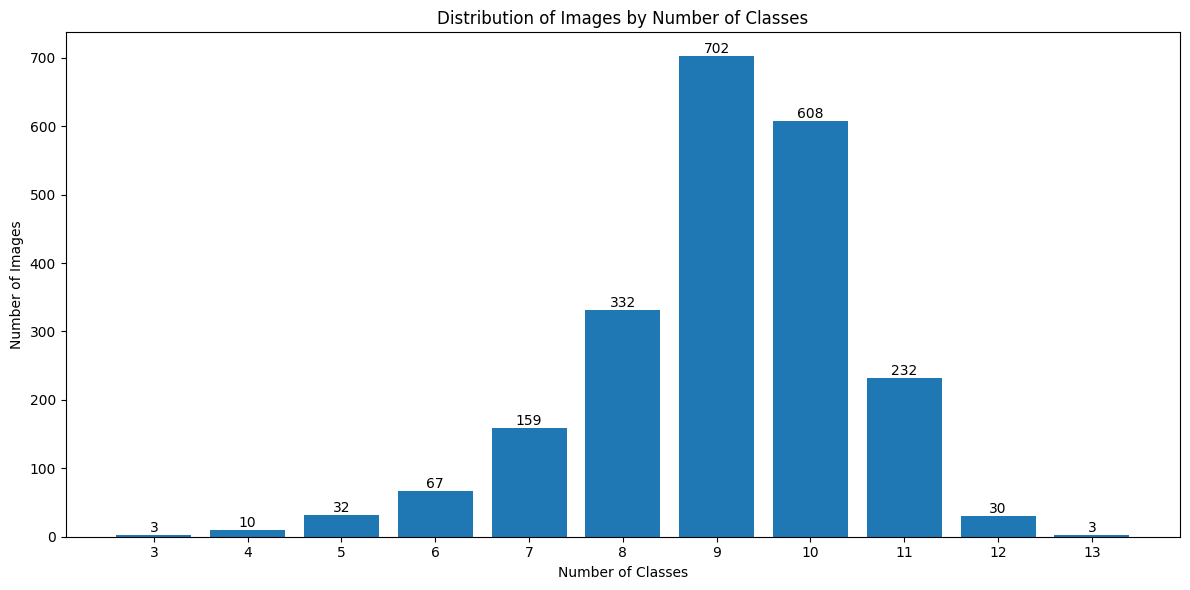

Total number of images: 2178
Minimum number of classes in an image: 3
Maximum number of classes in an image: 13
Most common class count: (9, 702)


<Figure size 640x480 with 0 Axes>

In [20]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# Read the JSON file
with open('all_images_class_counts_sync_2.json', 'r') as f:
    data = json.load(f)

# Extract class counts
class_counts = [item['class_count'] for item in data]

# Count the frequency of each class count
count_frequency = Counter(class_counts)

# Sort the counts and frequencies
sorted_counts = sorted(count_frequency.items())
counts, frequencies = zip(*sorted_counts)

# Create the histogram
plt.figure(figsize=(12, 6))
plt.bar(counts, frequencies)

# Customize the plot
plt.title('Distribution of Images by Number of Classes')
plt.xlabel('Number of Classes')
plt.ylabel('Number of Images')
plt.xticks(range(min(counts), max(counts)+1))

# Add value labels on top of each bar
for i, v in enumerate(frequencies):
    plt.text(counts[i], v, str(v), ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Optional: Save the plot as an image file
plt.savefig('class_count_histogram.png')

# Print summary statistics
print(f"Total number of images: {len(class_counts)}")
print(f"Minimum number of classes in an image: {min(counts)}")
print(f"Maximum number of classes in an image: {max(counts)}")
print(f"Most common class count: {count_frequency.most_common(1)[0]}")

In [28]:
import json

# Load the first JSON file (all_images_class_counts.json)
with open('all_images_class_counts_sync_3.json', 'r') as f:
    class_counts_data = json.load(f)

# Load the second JSON file (results_v1.json)
with open('results_v1.json', 'r') as f:
    results_data = json.load(f)

# Create a dictionary for quick lookup of emd and val_set values
results_lookup = {item['image'].replace('/data_2d_raw/', '/data_2d_raw/train/'): item for item in results_data}

# Update the class_counts_data with emd and val_set values
for item in class_counts_data:
    image_path = item['image_path']
    if image_path in results_lookup:
        item['emd'] = results_lookup[image_path]['emd']
        item['val_set'] = results_lookup[image_path]['val_set']
    else:
        print(f"Warning: No matching entry found for {image_path}")

# Save the updated data back to all_images_class_counts.json
with open('all_images_class_counts_updated_sync_3.json', 'w') as f:
    json.dump(class_counts_data, f, indent=4)

print("Updated JSON file saved as 'all_images_class_counts_updated.json'")

Updated JSON file saved as 'all_images_class_counts_updated.json'


In [24]:
import json

# Read the JSON file
with open('all_images_class_counts_updated.json', 'r') as f:
    data = json.load(f)

# Sort the data based on class_count in descending order
sorted_data = sorted(data, key=lambda x: x['class_count'], reverse=True)

# Write the sorted data back to a new JSON file
with open('all_images_class_counts_sorted.json', 'w') as f:
    json.dump(sorted_data, f, indent=4)

print("Sorted JSON file saved as 'all_images_class_counts_sorted.json'")

# Optionally, print the top N entries
N = 10  # Change this to the number of top entries you want to see
print(f"\nTop {N} images with the most classes:")
for item in sorted_data[:N]:
    print(f"Image: {item['image_path']}, Number of classes: {item['class_count']}")

Sorted JSON file saved as 'all_images_class_counts_sorted.json'

Top 10 images with the most classes:
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0000_sync/image_00/data_rect/0000002430.png, Number of classes: 16
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0000_sync/image_00/data_rect/0000002440.png, Number of classes: 16
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0000_sync/image_00/data_rect/0000010000.png, Number of classes: 16
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0000_sync/image_00/data_rect/0000010005.png, Number of classes: 16
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0000_sync/image_00/data_rect/0000010010.png, Number of classes: 16
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0010_sync/image_00/data_rect/0000000505.png, Number of classes: 16
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0010_sync/image_00/data_rect/00000

In [25]:
import json

# Read the JSON file
with open('all_images_class_counts_updated.json', 'r') as f:
    data = json.load(f)

# Sort the data based on class_count in descending order
sorted_data = sorted(data, key=lambda x: x['emd'], reverse=True)

# Write the sorted data back to a new JSON file
with open('all_images_emd_sorted.json', 'w') as f:
    json.dump(sorted_data, f, indent=4)

print("Sorted JSON file saved as 'all_images_class_counts_sorted.json'")

# Optionally, print the top N entries
N = 10  # Change this to the number of top entries you want to see
print(f"\nTop {N} images with the most classes:")
for item in sorted_data[:N]:
    print(f"Image: {item['image_path']}, Number of classes: {item['class_count']}")

KeyError: 'emd'

In [26]:
import json

# Read the JSON file
with open('all_images_class_counts_updated.json', 'r') as f:
    data = json.load(f)

# Sort the data based on emd in descending order
sorted_data = sorted(data, key=lambda x: x['emd'], reverse=True)

# Write the sorted data back to a new JSON file
with open('all_images_emd_sorted.json', 'w') as f:
    json.dump(sorted_data, f, indent=4)

print("Sorted JSON file saved as 'all_images_emd_sorted.json'")

# Optionally, print the top N entries
N = 10  # Change this to the number of top entries you want to see
print(f"\nTop {N} images with the highest EMD:")
for item in sorted_data[:N]:
    print(f"Image: {item['image_path']}, EMD: {item['emd']}, Class Count: {item['class_count']}")

KeyError: 'emd'

In [30]:
import json

# Read the JSON file
with open('all_images_class_counts_updated.json', 'r') as f:
    data = json.load(f)

# Function to get 'emd' value with a default
def get_emd(x):
    return x.get('emd', float('-inf'))  # Use negative infinity as default

# Sort the data based on emd in descending order
sorted_data = sorted(data, key=get_emd, reverse=False)

# Write the sorted data back to a new JSON file
with open('all_images_emd_sorted.json', 'w') as f:
    json.dump(sorted_data, f, indent=4)

print("Sorted JSON file saved as 'all_images_emd_sorted.json'")

# Optionally, print the top N entries
N = 10  # Change this to the number of top entries you want to see
print(f"\nTop {N} images with the highest EMD:")
for item in sorted_data[:N]:
    emd = item.get('emd', 'N/A')
    print(f"Image: {item['image_path']}, EMD: {emd}, Class Count: {item['class_count']}")

# Print statistics about missing EMD values
missing_emd = sum(1 for item in data if 'emd' not in item)
total_items = len(data)
print(f"\nStatistics:")
print(f"Total items: {total_items}")
print(f"Items missing EMD: {missing_emd}")
print(f"Percentage of items with EMD: {(total_items - missing_emd) / total_items * 100:.2f}%")

Sorted JSON file saved as 'all_images_emd_sorted.json'

Top 10 images with the highest EMD:
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0002_sync/image_00/data_rect/0000004415.png, EMD: N/A, Class Count: 13
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0002_sync/image_00/data_rect/0000004420.png, EMD: N/A, Class Count: 13
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0002_sync/image_00/data_rect/0000005245.png, EMD: N/A, Class Count: 13
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0002_sync/image_00/data_rect/0000004425.png, EMD: N/A, Class Count: 12
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0002_sync/image_00/data_rect/0000004430.png, EMD: N/A, Class Count: 12
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0002_sync/image_00/data_rect/0000004435.png, EMD: N/A, Class Count: 12
Image: datasets/data/KITTI-360/data_2d_raw/train/2013_05_28_drive_0002_sync/image_00/d

In [31]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the JSON file
with open('all_images_emd_sorted.json', 'r') as f:
    data = json.load(f)

# Filter out entries without 'emd' or 'class_count'
filtered_data = [item for item in data if 'emd' in item and 'class_count' in item]

# Convert the filtered data to a pandas DataFrame
df = pd.DataFrame(filtered_data)

# Calculate the correlation coefficient
correlation = df['class_count'].corr(df['emd'])

print(f"Correlation coefficient between class_count and emd: {correlation}")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='class_count', y='emd', data=df)
plt.title('Scatter plot of class_count vs emd')
plt.xlabel('Class Count')
plt.ylabel('EMD')
plt.savefig('class_count_vs_emd_scatter.png')
plt.close()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['class_count', 'emd']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.close()

# Create a joint plot
sns.jointplot(x='class_count', y='emd', data=df, kind='hex')
plt.savefig('class_count_vs_emd_jointplot.png')
plt.close()

print("Plots have been saved as PNG files.")

# Additional statistics
print("\nDescriptive Statistics:")
print(df[['class_count', 'emd']].describe())

# Count of images per class_count
print("\nCount of images per class_count:")
print(df['class_count'].value_counts().sort_index())

# Print information about filtered entries
total_entries = len(data)
filtered_entries = len(filtered_data)
print(f"\nTotal entries in original data: {total_entries}")
print(f"Entries with both 'emd' and 'class_count': {filtered_entries}")
print(f"Entries filtered out: {total_entries - filtered_entries}")

Correlation coefficient between class_count and emd: -0.5590610002689633
Plots have been saved as PNG files.

Descriptive Statistics:
        class_count           emd
count  12259.000000  12259.000000
mean       9.497838     11.739608
std        1.707686      1.432021
min        1.000000      8.389082
25%        9.000000     10.727020
50%       10.000000     11.497679
75%       11.000000     12.523126
max       16.000000     20.250978

Count of images per class_count:
class_count
1        3
2       10
3        4
4      130
5      180
6      355
7      641
8     1373
9     2821
10    3627
11    2133
12     659
13     212
14      84
15      16
16      11
Name: count, dtype: int64

Total entries in original data: 14431
Entries with both 'emd' and 'class_count': 12259
Entries filtered out: 2172
